In [2]:
from nltk.tree import Tree
import nltk
from benepar2 import ptb_unescape, tetra_tag, retokenization
from transformers import AutoConfig, GPT2TokenizerFast
import numpy as np

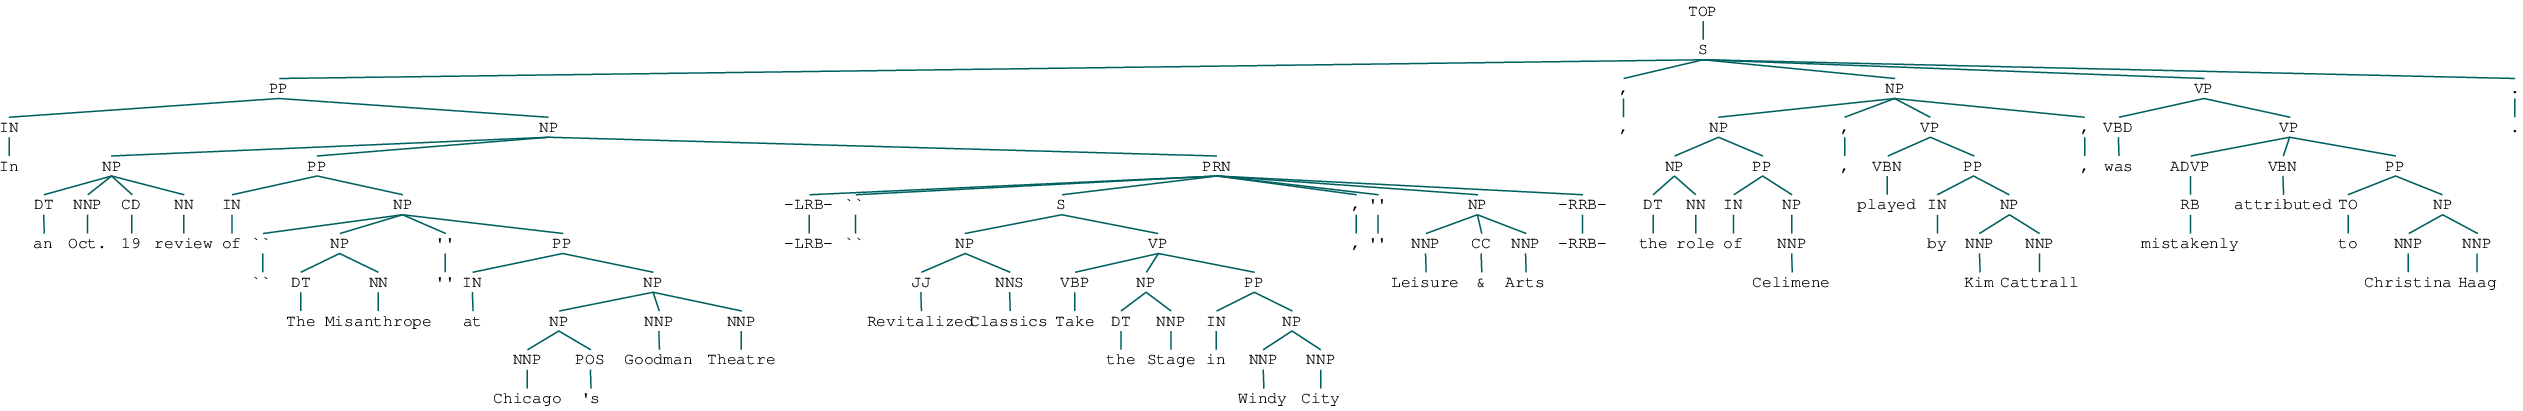

In [3]:
tree = Tree.fromstring("""(TOP
  (S
    (PP
      (IN In)
      (NP
        (NP (DT an) (NNP Oct.) (CD 19) (NN review))
        (PP
          (IN of)
          (NP
            (`` ``)
            (NP (DT The) (NN Misanthrope))
            ('' '')
            (PP
              (IN at)
              (NP
                (NP (NNP Chicago) (POS 's))
                (NNP Goodman)
                (NNP Theatre)))))
        (PRN
          (-LRB- -LRB-)
          (`` ``)
          (S
            (NP (JJ Revitalized) (NNS Classics))
            (VP
              (VBP Take)
              (NP (DT the) (NNP Stage))
              (PP (IN in) (NP (NNP Windy) (NNP City)))))
          (, ,)
          ('' '')
          (NP (NNP Leisure) (CC &) (NNP Arts))
          (-RRB- -RRB-))))
    (, ,)
    (NP
      (NP (NP (DT the) (NN role)) (PP (IN of) (NP (NNP Celimene))))
      (, ,)
      (VP (VBN played) (PP (IN by) (NP (NNP Kim) (NNP Cattrall))))
      (, ,))
    (VP
      (VBD was)
      (VP
        (ADVP (RB mistakenly))
        (VBN attributed)
        (PP (TO to) (NP (NNP Christina) (NNP Haag)))))
    (. .)))
""")
tree

In [4]:
retokenizer = retokenization.Retokenizer(
                'gpt2', retain_start_stop=True
            )

In [6]:
encoded = retokenizer(tree.leaves(), [True for t in tree.leaves()])

In [7]:
encoded

{'input_ids': [818, 281, 2556, 13, 678, 2423, 286, 7559, 383, 337, 9057, 26110, 431, 10148, 379, 4842, 705, 82, 33318, 15752, 532, 43, 27912, 12, 7559, 5416, 1287, 1143, 40184, 7214, 262, 15371, 287, 3086, 88, 2254, 837, 10148, 1004, 20609, 1222, 11536, 532, 21095, 33, 12, 837, 262, 2597, 286, 15248, 320, 1734, 837, 2826, 416, 6502, 327, 35226, 439, 837, 373, 33168, 14183, 284, 33673, 9398, 363, 764, 220, 50256], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'words_from_tokens': [70, 0, 1, 3, 4, 5, 6, 7, 8, 12, 13, 14, 15, 17, 18, 19, 23, 24, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 39, 40, 41, 45, 46, 47, 48, 49, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 67, 68, 70]}

In [9]:
len(encoded['words_from_tokens']
   )

51